1. In a notebook, load the table from the file applications.csv into a Pandas DataFrame and clean the data:
1.1 Remove duplicates by applicant_id
1.2 Fill missing values in the 'External Rating' column with zeros
1.3 Fill missing values in the 'Education level' column with the text "Secondary"

2. Add industry ratings from the file industries.csv to this DataFrame.

   
3. Calculate the application rating according to the following conditions:
The rating must be a number between 0 and 100.
The rating is the sum of scores based on 6 criteria.
The rating equals zero if the 'Amount' value is missing or if 'External Rating' equals zero.

Rating components:
3.1 If the applicant’s age is between 35 and 55, add 20 points to the rating.
3.2 If the application was submitted on a weekday (not on weekends), add 20 points to the rating.
3.3 If the applicant is married, add 20 points to the rating.
3.4 If the applicant is located in Kyiv city or Kyiv region, add 10 points to the rating.
3.5 The 'Score' value from the industries.csv file is also added to the application (ranging from 0 to 20 points).
3.6 If 'External Rating' is greater than or equal to 7, add 20 points to the rating.
3.7 If 'External Rating' is less than or equal to 2, subtract 20 points from the rating.

4. In the resulting table, keep only applications with a rating greater than zero; these applications will be considered accepted.
   
5. Group the data in the resulting table by the week the application was submitted and output the average rating of accepted applications per week.

In [16]:
import pandas as pd

In [17]:
df_app = pd.read_csv(r'C:\Users\admin\Documents\Домашка пайтон\2\applications(2.0).csv')
df_ind = pd.read_csv(r'C:\Users\admin\Documents\Домашка пайтон\2\industries(2.0).csv')

In [18]:
df_app.sample(5)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
7644,12.11.2022 19:14,16500.0,35,Чоловік,Cloud Computing,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,b02b0bc915804137c0b6797b64d13c2a
11460,12.26.2022 18:35:50,5400.0,24,Чоловік,E-commerce,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,bb0b89cdb2bf6d4e58e3d80662ed0afc
3103,12.02.2022 10:32,11850.0,34,Чоловік,E-commerce,Married,6.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,8cb087f0c8259422f89bf29747bc783d
8531,12.12.2022 18:54,900.0,18,Чоловік,Інша,Other,3.0,Ще студент вишу,Чернівці чи область,dbaba3063872df70e5b99c952e4c0f60
3526,12.03.2022 14:20,3450.0,20,Чоловік,E-commerce,Married,1.0,Середня спеціальна,Львів чи область,979f94aeafd1ba6bf25dcaa8cff5e023


In [19]:
df_ind.sample(5)

,Industry,Score
24,Embedded,10
30,High Load Systems,15
7,Інша,10
3,Telecom,15
29,Hardware,15


In [20]:
df_app.shape

(13315, 10)

In [21]:
df_ind.shape

(37, 2)

In [22]:
# 1.1 Remove duplicates in applicant_id
df_app = df_app.drop_duplicates(subset='applicant_id', keep='last')
df_app.shape

(13278, 10)

In [23]:
# 1.2 Fill in the missing values in the 'External Rating' field with zeros
df_app = df_app.copy()
df_app['External Rating'] = df_app['External Rating'].fillna(0)
df_app

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3
5,11.30.2022 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696
...,...,...,...,...,...,...,...,...,...,...
13310,01.09.2023 11:01,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d
13311,01.09.2023 11:14,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de
13312,01.09.2023 11:19,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7
13313,01.09.2023 11:28,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726


In [24]:
# 1.3 In the 'Education level' field, fill in the missing values with the text 'Secondary'.
df_app = df_app.copy()
df_app['Education level'] = df_app['Education level'].fillna('Secondary')
df_app

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3
5,11.30.2022 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696
...,...,...,...,...,...,...,...,...,...,...
13310,01.09.2023 11:01,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d
13311,01.09.2023 11:14,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de
13312,01.09.2023 11:19,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7
13313,01.09.2023 11:28,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726


In [25]:
# 2. Add data from the industries.csv file to this DataFrame, namely, the industry ratings.
df_app = df_app.merge(df_ind, on='Industry', how='left')
df_app.sample(5)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
12223,12.29.2022 15:43:20,2700.0,29,Чоловік,Mobile,Married,2.0,"Вища (бакалавр, спеціаліст, магістр)",Кропивницький чи область,9cec44650194346075ea9bfde721a008,15
4396,12.05.2022 13:30,3600.0,22,Жінка,Edtech / Education,Other,3.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,fa74c718ed6e69f52a2bfa85d4e185cf,15
2529,12.01.2022 11:07,6900.0,31,Чоловік,Adtech / Advertising,Married,2.0,Дві вищі,Львів чи область,efd2f36a017048d9ff271c0a4c319846,10
9394,12.14.2022 20:45:05,6600.0,24,Чоловік,Інша,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,c9eba99168930cb913d45ce96b32e18a,10
11889,12.28.2022 2:38:07,6000.0,31,Чоловік,Mobile,Single,2.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,a4662c33a7320802a62d50a777f7d1de,15


In [28]:
df_app = df_app.rename(columns = {'Score' : 'Reg_Score'})
df_app.sample(3)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Reg_Score
8015,12.12.2022 11:58,13500.0,27,Жінка,Adtech / Advertising,Other,5.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d86833b84187934e97bf4912a1665141,10
4232,12.04.2022 23:50,8700.0,38,Чоловік,Telecom,Single,10.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f52cd38690fbc4d348572f2d75592c01,15
10000,12.19.2022 17:40:21,17100.0,28,Чоловік,Medtech / Healthcare,Married,8.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,ae182c4a06a9963d30d6c3de04cb6a63,15


3. Calculate the application rating according to the following conditions:
The rating must be a number between 0 and 100.
The rating is the sum of scores based on 6 criteria.
The rating equals zero if the 'Amount' value is missing or if 'External Rating' equals zero.

Rating components:
3.1 If the applicant’s age is between 35 and 55, add 20 points to the rating.
3.2 If the application was submitted on a weekday (not on weekends), add 20 points to the rating.
3.3 If the applicant is married, add 20 points to the rating.
3.4 If the applicant is located in Kyiv city or Kyiv region, add 10 points to the rating.
3.5 The 'Score' value from the industries.csv file is also added to the application (ranging from 0 to 20 points).
3.6 If 'External Rating' is greater than or equal to 7, add 20 points to the rating.
3.7 If 'External Rating' is less than or equal to 2, subtract 20 points from the rating.

In [29]:
if_1 = (df_app['Age'] >= 35) & (df_app['Age'] <= 55) * 20

In [30]:
df_app['Applied at'].sample(3)

3705        12.03.2022 16:15
11397    12.26.2022 18:01:18
3231        12.02.2022 16:52
Name: Applied at, dtype: object

In [31]:
df_app['Applied at'] = pd.to_datetime(df_app['Applied at'], format = 'mixed')
df_app['Applied at'].sample(3)

1157    2022-11-30 16:20:56
10846   2022-12-24 16:10:25
551     2022-11-30 12:17:57
Name: Applied at, dtype: datetime64[ns]

In [32]:
df_app['Applied at'].dt.weekday

0        2
1        2
2        2
3        2
4        2
        ..
13273    0
13274    0
13275    0
13276    0
13277    0
Name: Applied at, Length: 13278, dtype: int32

In [33]:
df_app['Applied at'].dt.day_name()

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
13273       Monday
13274       Monday
13275       Monday
13276       Monday
13277       Monday
Name: Applied at, Length: 13278, dtype: object

In [34]:
if_2 = (pd.to_datetime(df_app['Applied at']).dt.dayofweek.isin([5, 6])) * 20
if_3 = (df_app['Marital status'] == 'Married') * 20
if_4 = df_app['Location'].str.contains('Київ', case=False, na=False) * 10
if_5 = df_app['Reg_Score'].fillna(0)
if_6 = df_app['External Rating'] >= 7 * 20
if_7 = df_app['External Rating'] <= 2 * 20

In [35]:
# Sum of the application scores across all criteria
df_app ['Score'] = if_1 + if_2 + if_3 + if_4 + if_5 + if_6 +if_7
df_app.sample(5)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Reg_Score,Score
5981,2022-12-07 13:34:00,2400.0,27,Чоловік,Public services / Government,Single,3.0,Середня спеціальна,Київ чи область,7b64eaf5ecdab2daf3feb70a8d8f517d,20,31
10339,2022-12-20 15:12:38,13500.0,32,Чоловік,E-commerce,Other,9.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,3ca2c8ef605e2560090dd49b4da0eac6,15,16
6339,2022-12-07 17:38:00,15000.0,30,Чоловік,Internet of Things,Single,2.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,08b439b1efed06b9b8085e26596d4aec,15,26
3420,2022-12-03 12:52:00,15000.0,30,Чоловік,Security,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,081a21504442a5da33cc3882f70261ec,15,36
10807,2022-12-24 15:34:05,4500.0,28,Чоловік,Automotive,Married,4.0,"Вища (бакалавр, спеціаліст, магістр)",Ужгород чи Закарпатська область,46df8d8ad11b74ca9684da1c5aa2580b,15,56


In [36]:
df_app.shape

(13278, 12)

In [37]:
# 4. In the resulting table, keep only applications with a rating greater than zero; these applications will be considered accepted.
df_app= df_app[(df_app['Score'] > 0) & (df_app['Score'] < 100)]
df_app.shape

(13278, 12)

In [38]:
# 5. The data from the resulting table is grouped by the week the application was submitted, and the average rating of accepted applications for each week is displayed.
df_app['Applied at'].dt.to_period('W')

0        2022-11-28/2022-12-04
1        2022-11-28/2022-12-04
2        2022-11-28/2022-12-04
3        2022-11-28/2022-12-04
4        2022-11-28/2022-12-04
                 ...          
13273    2023-01-09/2023-01-15
13274    2023-01-09/2023-01-15
13275    2023-01-09/2023-01-15
13276    2023-01-09/2023-01-15
13277    2023-01-09/2023-01-15
Name: Applied at, Length: 13278, dtype: period[W-SUN]

In [39]:
df_app['Applied at'].dt.isocalendar().week

0        48
1        48
2        48
3        48
4        48
         ..
13273     2
13274     2
13275     2
13276     2
13277     2
Name: week, Length: 13278, dtype: UInt32

In [40]:
df_app['Applied at'].dt.year

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
13273    2023
13274    2023
13275    2023
13276    2023
13277    2023
Name: Applied at, Length: 13278, dtype: int32

In [41]:
df_app['year_week'] = df_app['Applied at'].dt.year.astype(str) + '-' + df_app['Applied at'].dt.isocalendar().week.astype(str)
df_app.sample(5)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Reg_Score,Score,year_week
9351,2022-12-14 18:39:15,12000.0,29,Жінка,Insurance,Married,5.0,Дві вищі,Суми чи область,0b6b30adbcce999abff88d58125de148,10,31,2022-50
9989,2022-12-19 17:34:03,5100.0,28,Чоловік,E-commerce,Married,2.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,d473565049758bf316571fe6959d3be8,15,36,2022-51
3055,2022-12-02 08:59:00,7500.0,29,Жінка,AR/VR,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,d81d139f0ccfdd108732240b1ebec8bf,10,31,2022-48
9436,2022-12-15 00:00:22,9000.0,46,Чоловік,Media,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f140d18ede339be3626cefbefb826b98,5,36,2022-50
1807,2022-11-30 19:05:40,1680.0,37,Чоловік,Hardware,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Ужгород чи Закарпатська область,1961a58ede784a363de6b090d8078e6f,15,16,2022-48


In [42]:
grouped_week = df_app.groupby('year_week')['Score'].mean().sort_index()
grouped_week

year_week
2022-48    33.577295
2022-49    30.133353
2022-50    29.694494
2022-51    34.469211
2022-52    29.467524
2023-1     30.118477
2023-2     25.375000
2023-52    51.357143
Name: Score, dtype: float64

In [43]:
import seaborn as sns

In [44]:
sns.set_theme()

<Axes: xlabel='year_week'>

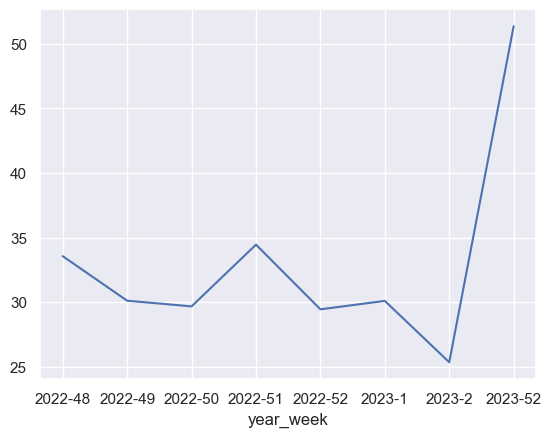

In [45]:
sns.lineplot(x = grouped_week.index, y = grouped_week.values)